In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression


import sys
import os

import sys
import os
sys.path.append(os.path.abspath("../../.."))

from Preprocessing.imputation import get_imputation_maps, apply_imputation, ContextImputer

from Preprocessing.split_new import split_data
from utils.eval_call import evaluate_model
from utils.scatter_plot import scatter_prediction

Linear Regression Performance Metrics:
MAE: 5650.06
MSE: 436320788.96
RMSE: 20888.29
R²: 0.70
------------------------------


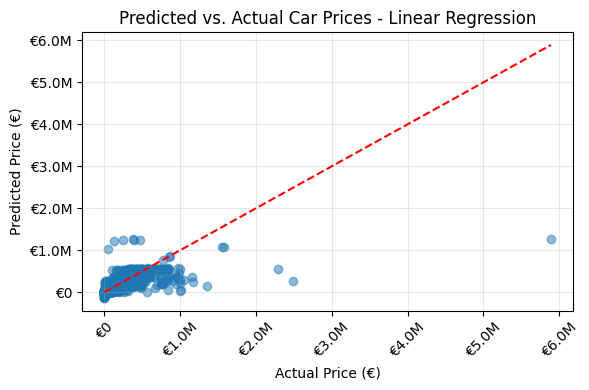

In [3]:
def main():


    X_train, X_test, y_train, y_test, categorical_features , numeric_features = split_data('../../../data.csv', fuel_type = ['Petrol', 'Diesel'])

    # Preprocessing-Pipelines erstellen
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])


    linear_regression_pipeline = Pipeline(steps=[
        ('imp_fc', ContextImputer('fuel_consumption_l_100km')),
        ('imp_ps', ContextImputer('power_ps')),
        ('imp_er', ContextImputer('electric_range')),
        ('preprocessor', preprocessor),
        ('model', LinearRegression())
    ])

    # Modell trainieren
    linear_regression_pipeline.fit(X_train, y_train)

    # Vorhersagen treffen
    y_pred_lr = linear_regression_pipeline.predict(X_train)



    evaluate_model(y_train, y_pred_lr, "Linear Regression")

    scatter_prediction(y_train, y_pred_lr, "Linear Regression")


if __name__ == "__main__":
    main()